In [142]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn.impute import KNNImputer

The features: \
**customer_id :** id of the credit card holder\
**balance_account :** balance amount left in the account to make purchases at the end of the 6-month period\
**purchases_amount :** amount of purchases made from account\
**paid_advance :** number of transactions made with “Cash in Advance” method\
**full_purchases :** maximum purchase amount done in full payment\
**balance_frequency_update :** how frequently the balance has been updated, score between 0 and 1 (1 = frequently - updated, 0 = not frequently updated)\
**installments :** amount of purchases done in installments\
**purchases_frequency :** how frequently the purchases are being made, score between 0 and 1 (1 = frequently - - purchased, 0 = not frequently purchased)\
**full_purchases_frequency :** how frequently purchases are happening in full payment (1 = frequently purchased, - 0 = not frequently purchased)\
**purchases_installments_frequency :** how frequently purchases in installments are being done (1 = frequently - done, 0 = not frequently done)\
**cash_advance_frequency :** how frequently the cash in advance being paid\
**nr_cash_advances :** cash in advance given by the user\
**nr_purchases :** number of purchase transactions made\
**credit_limit :** limit of credit card for user\
**fixed_rate_period :** duration of fixed interest rate of credit card service for user (in months)\
**payments :** amount of payment done by user\
**min_payments :** minimum amount of payments made by user\
**full_payment_prc :** percent of full payment paid by user

In [143]:
path = "../data/card_transactions.csv"
df = pd.read_csv(path, na_values=["?", ""])
df

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.60,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.30,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.00,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.00,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,zdVfd3CYHYBjf61b,1127.607606,0.00,271.093275,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.083333,1,0,8500.0,12,662.387331,260.277533,0.000000
8496,JGghMowcxhfbVGKm,21.409828,149.71,0.000000,0.00,1.000000,149.71,0.916667,0.000000,0.916667,0.000000,0,11,1500.0,12,141.974905,150.500248,0.166667
8497,5GrEtC6ncxuLpnXZ,0.000000,0.00,253.887233,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.111111,1,0,500.0,9,2437.932505,NaN,0.000000
8498,Ox7ETtYHjE2uo4Xo,1646.384530,1047.34,146.650389,1047.34,1.000000,0.00,0.583333,0.583333,0.000000,0.166667,2,51,3000.0,12,462.848132,497.408854,0.000000


In [144]:
df.info()  # there is missin data in credit_limit and min_payments

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       8500 non-null   object 
 1   balance_account                   8500 non-null   float64
 2   purchases_amount                  8500 non-null   float64
 3   paid_advance                      8500 non-null   float64
 4   full_purchases                    8500 non-null   float64
 5   balance_frequency_update          8500 non-null   float64
 6   installments                      8500 non-null   float64
 7   purchases_frequency               8500 non-null   float64
 8   full_purchases_frequency          8500 non-null   float64
 9   purchases_installments_frequency  8500 non-null   float64
 10  cash_advance_frequency            8500 non-null   float64
 11  nr_cash_advances                  8500 non-null   int64  
 12  nr_pur

In [145]:
df.set_index("customer_id", inplace=True)

In [146]:
# impute missing numerical values with knn
num_cols = df.columns
knn_imp = KNNImputer(n_neighbors=5)
df = pd.DataFrame(knn_imp.fit_transform(df), columns=num_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance_account                   8500 non-null   float64
 1   purchases_amount                  8500 non-null   float64
 2   paid_advance                      8500 non-null   float64
 3   full_purchases                    8500 non-null   float64
 4   balance_frequency_update          8500 non-null   float64
 5   installments                      8500 non-null   float64
 6   purchases_frequency               8500 non-null   float64
 7   full_purchases_frequency          8500 non-null   float64
 8   purchases_installments_frequency  8500 non-null   float64
 9   cash_advance_frequency            8500 non-null   float64
 10  nr_cash_advances                  8500 non-null   float64
 11  nr_purchases                      8500 non-null   float64
 12  credit

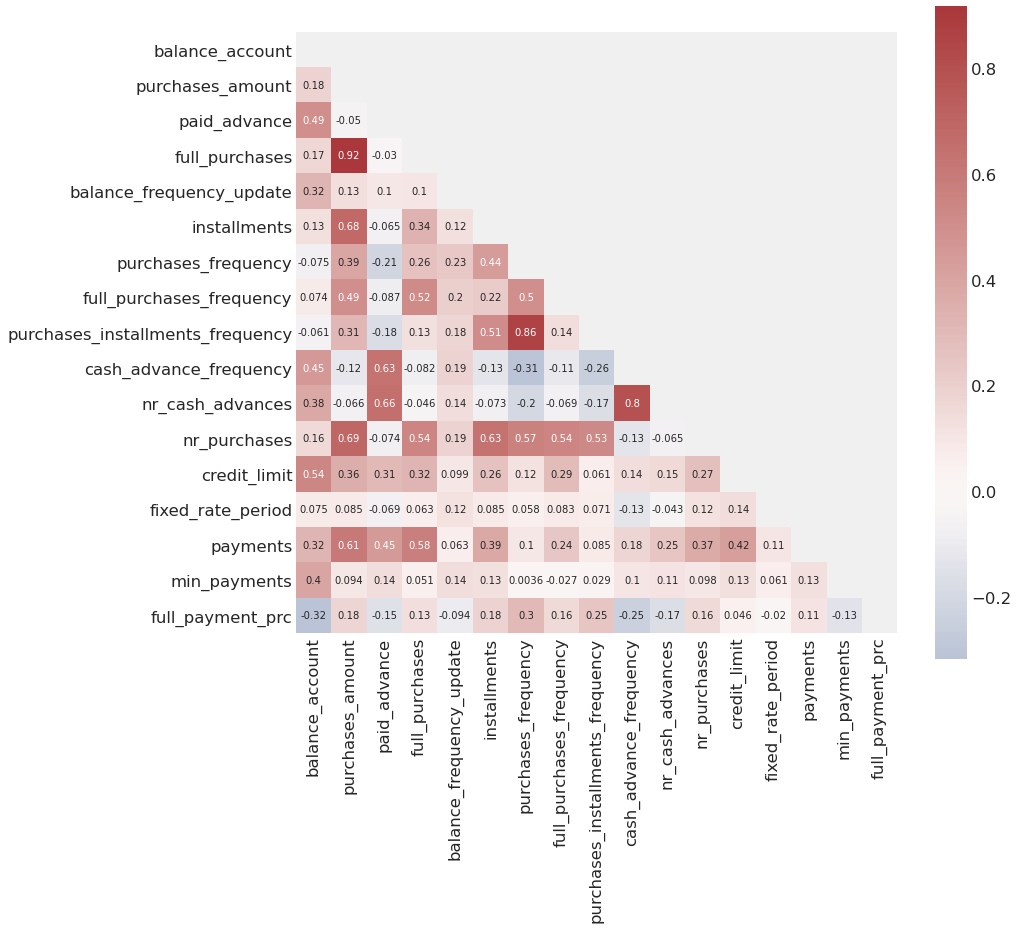

In [147]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(corr, mask=mask, square=True, cmap="vlag", center=0, annot=True)


In [148]:
# drop variables that are correlated higher than 0.85
corr_upper = np.triu(corr, k=1)
idx = corr[(abs(corr_upper) > 0.85).any(axis=1)].index
df.drop(idx, axis=1, inplace=True)
df.columns

Index(['balance_account', 'paid_advance', 'full_purchases',
       'balance_frequency_update', 'installments', 'full_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'nr_cash_advances', 'nr_purchases', 'credit_limit', 'fixed_rate_period',
       'payments', 'min_payments', 'full_payment_prc'],
      dtype='object')

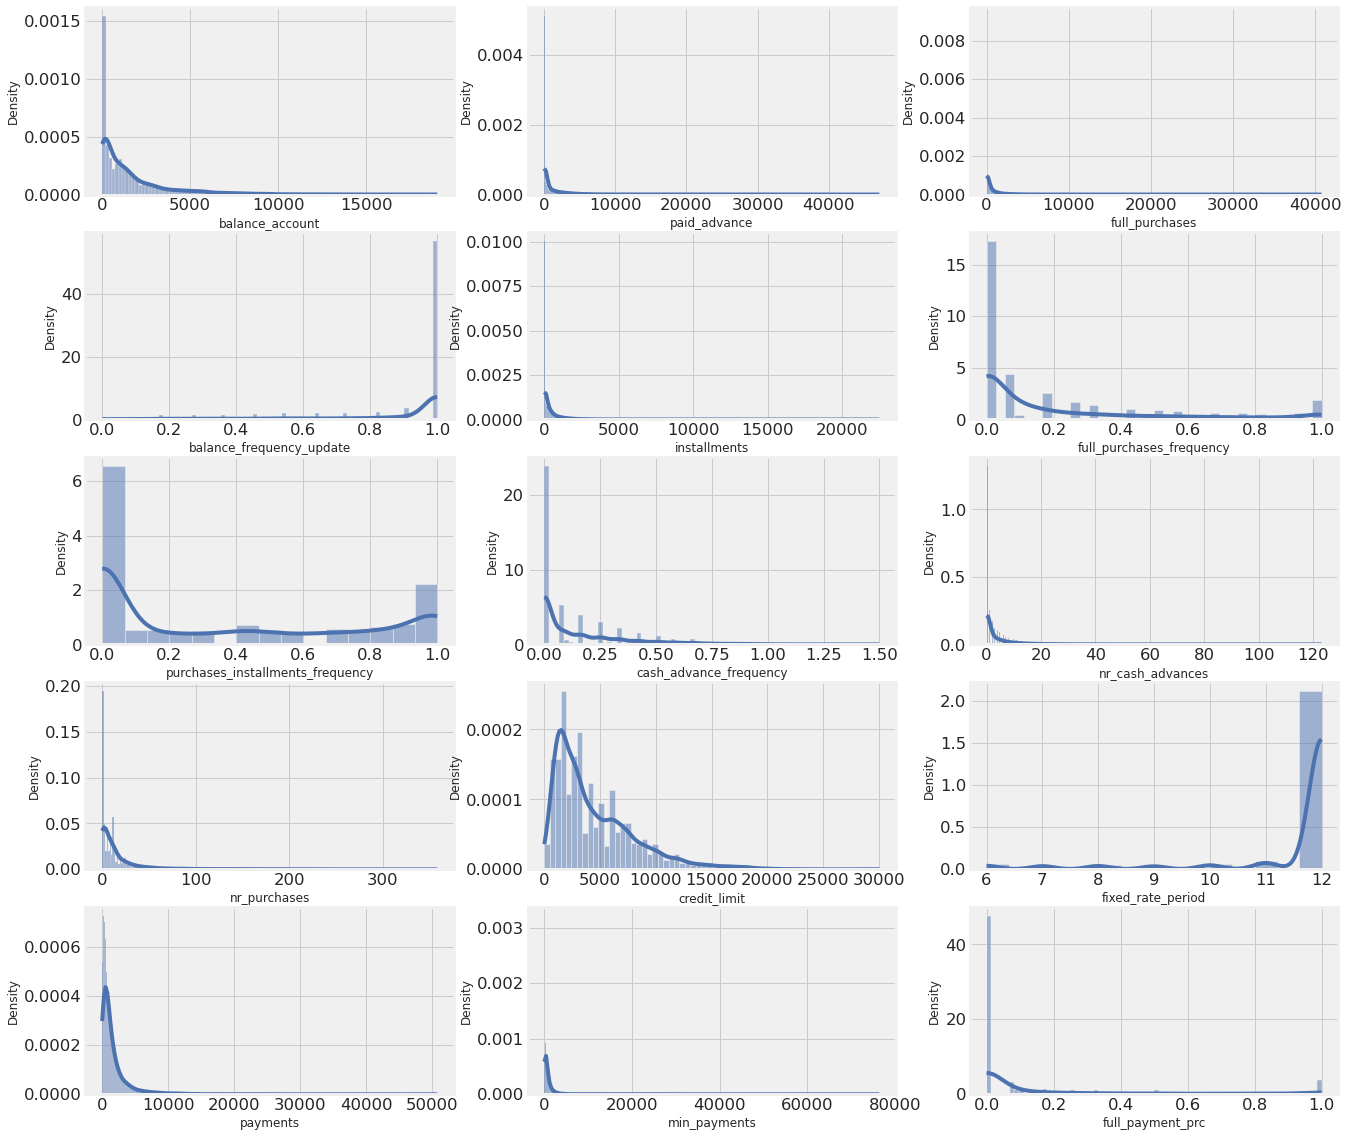

In [149]:
fig, axs = plt.subplots(5, 3, sharex=False, sharey=False, figsize=(20, 20))
for index, name in enumerate(df.columns):
    col = index % 3
    row = (index - col) // 3
    ax = axs[row][col]
    sns.histplot(ax=ax, data=df, x=name, kde=True, stat="density")

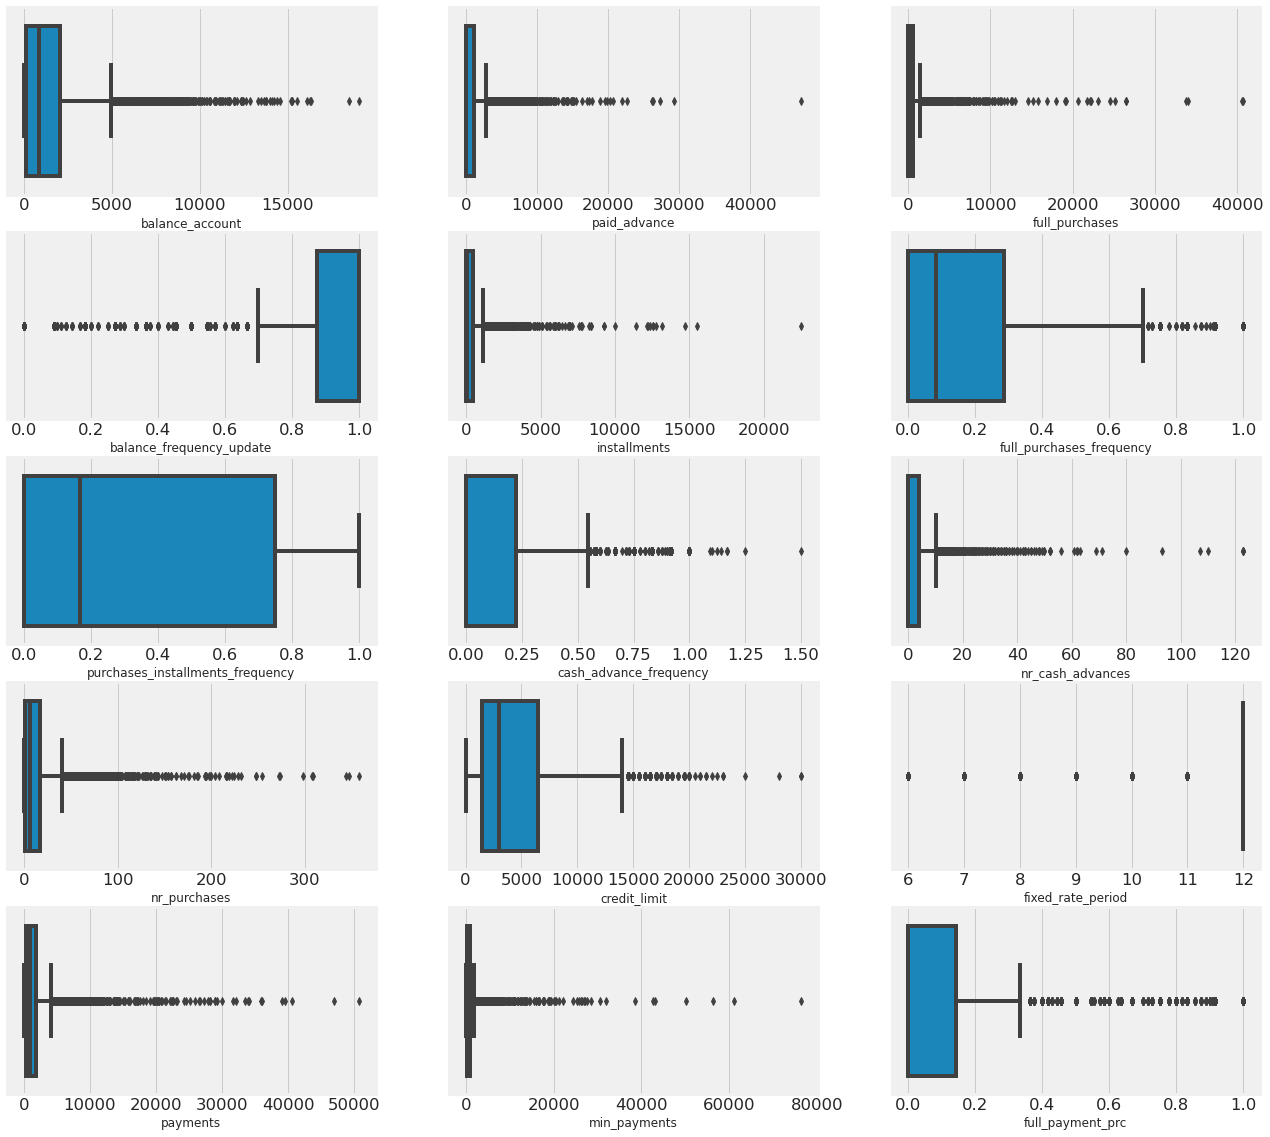

In [150]:
fig, axs = plt.subplots(5, 3, sharex=False, sharey=False, figsize=(20, 20))
for index, name in enumerate(df.columns):
    col = index % 3
    row = (index - col) // 3
    ax = axs[row][col]
    sns.boxplot(ax=ax, data=df, x=name)
plt.show()

In [151]:
columns_to_scale = [
    "balance_account",
    "paid_advance",
    "full_purchases",
    "installments",
    "nr_cash_advances",
    "nr_purchases",
    "credit_limit",
    "fixed_rate_period",
    "payments",
    "min_payments",
]

In [152]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

subset_df = df[columns_to_scale].copy()  # could not use timestamp

mms = MinMaxScaler(feature_range=(0, 1))
subset_df[columns_to_scale] = mms.fit_transform(subset_df)
subset_df.head()

,balance_account,paid_advance,full_purchases,installments,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments
0,0.000488,0.000000,0.000000,0.004782,0.00000,0.027933,0.031720,0.833333,0.001772,0.001174
1,0.002766,0.000000,0.000000,0.006680,0.00000,0.016760,0.031720,0.000000,0.001079,0.001085
2,0.071459,0.009819,0.000000,0.000000,0.04878,0.000000,0.048414,0.833333,0.005974,0.005808
3,0.106161,0.000000,0.008910,0.000000,0.00000,0.036313,0.065109,1.000000,0.013884,0.010416
4,0.001172,0.024652,0.002331,0.000000,0.02439,0.002793,0.081803,1.000000,0.080720,0.000525


In [153]:
df.drop(columns_to_scale, axis=1, inplace=True)

In [154]:
df = df.join(subset_df)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance_frequency_update          8500 non-null   float64
 1   full_purchases_frequency          8500 non-null   float64
 2   purchases_installments_frequency  8500 non-null   float64
 3   cash_advance_frequency            8500 non-null   float64
 4   full_payment_prc                  8500 non-null   float64
 5   balance_account                   8500 non-null   float64
 6   paid_advance                      8500 non-null   float64
 7   full_purchases                    8500 non-null   float64
 8   installments                      8500 non-null   float64
 9   nr_cash_advances                  8500 non-null   float64
 10  nr_purchases                      8500 non-null   float64
 11  credit_limit                      8500 non-null   float64
 12  fixed_

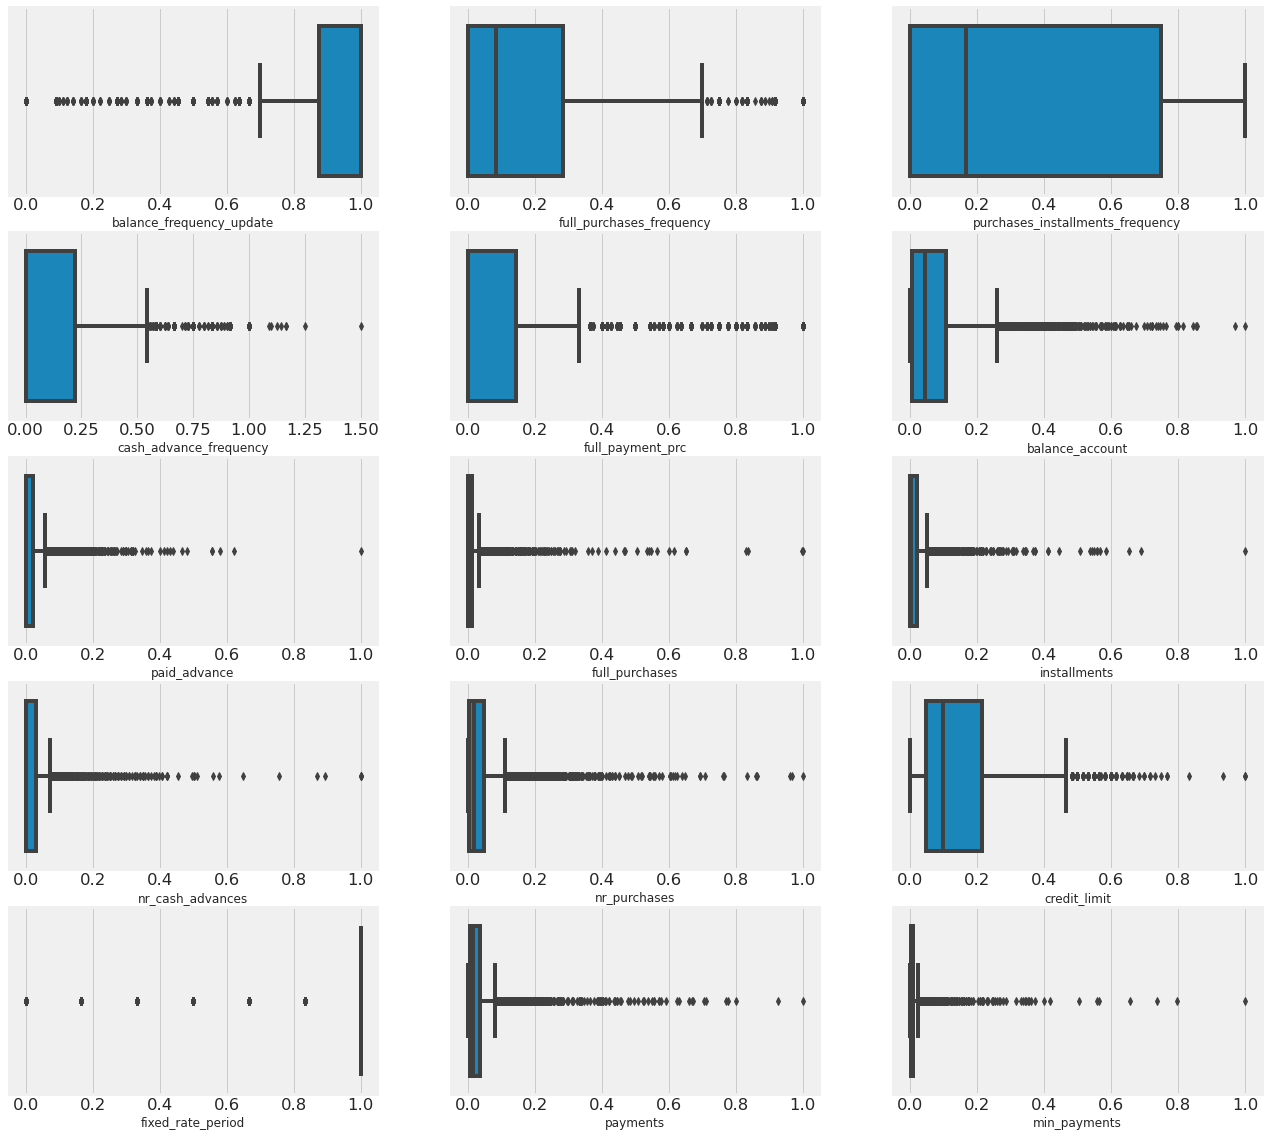

In [156]:
fig, axs = plt.subplots(5, 3, sharex=False, sharey=False, figsize=(20, 20))
for index, name in enumerate(df.columns):
    col = index % 3
    row = (index - col) // 3
    ax = axs[row][col]
    sns.boxplot(ax=ax, data=df, x=name)

In [157]:
# import warnings
# warnings.filterwarnings("ignore")

# fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
# for i in range(3):
#     for j in range(3):
#         sns.distplot(df[df.columns[3 * i + j]], ax=axs[i,j])
# plt.show()[0]

# KMEANS 

In [168]:
#Determining Appropriate Number of Clusters (Elbow Curve)
from sklearn.cluster import KMeans

df2 = df.drop(columns='credit_limit')

cluster_range = range(2,25)
cluster_errors = []
for i in cluster_range:
    clusters = KMeans(i) 
    clusters.fit(df2) 
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range, "cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,2,3049.193824
1,3,2567.728357
2,4,2213.940499
3,5,1935.861360
4,6,1707.304466
5,7,1543.341108
6,8,1417.000712
7,9,1295.834405
8,10,1228.532264
9,11,1129.072976


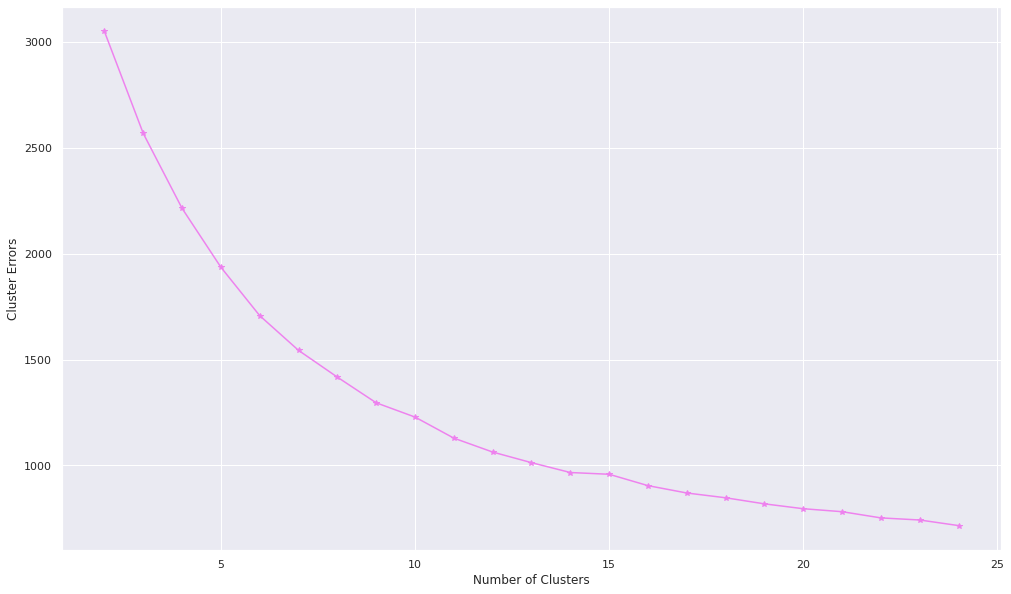

In [169]:
plt.figure(figsize=(15,10))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors, marker = '*',color='violet')# Scree Plot/Elbow Curve
plt.xlabel("Number of Clusters")
plt.ylabel("Cluster Errors")
plt.grid(True)
plt.show()

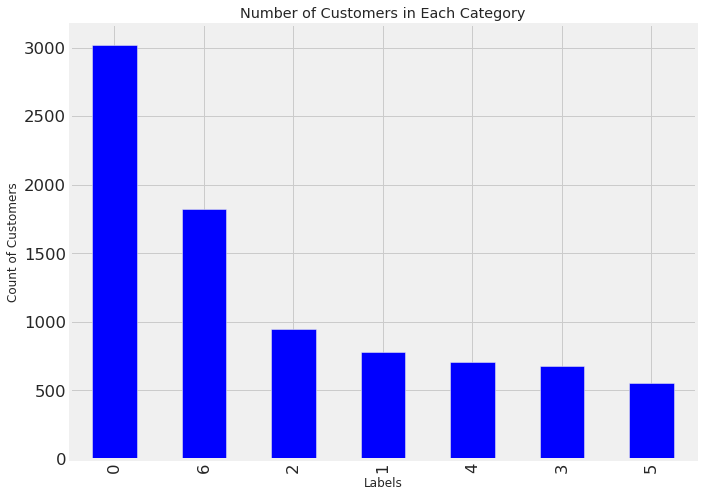

In [160]:
#kmeans

kmeans = KMeans(n_clusters=7, n_init=100, random_state=42)
kmeans.fit(df2)
df_labeled = pd.DataFrame(kmeans.labels_, columns = list(['labels']))
df_labeled['labels'] = df_labeled['labels'].astype('category')

plt.figure(figsize=(10,8))
df_labeled['labels'].value_counts().plot.bar(color='blue')
plt.xlabel("Labels")
plt.ylabel("Count of Customers")
plt.title("Number of Customers in Each Category")
plt.show()

In [161]:
# df = df.join(df_labeled)

In [162]:
# from sklearn.metrics import silhouette_score

# def evaluate_metrics(df, min_clust=2, max_clust=8, rand_state=42):
#     inertias = []
#     silhouette = []
#     for n_clust in range(min_clust, max_clust):
#         kmeans = KMeans(n_clusters=n_clust, random_state=rand_state)
#         y_label = kmeans.fit_predict(df)
#         inertias.append(kmeans.inertia_)
#         silhouette.append(silhouette_score(df, y_label))     

#     fig, ax = plt.subplots(1, 2, figsize=(15, 10))
#     ax[0].plot(range(min_clust, max_clust), inertias, '-x', linewidth=2)
#     ax[0].set_xlabel('No. of clusters')
#     ax[0].set_ylabel('Inertia')
    
#     ax[1].plot(range(min_clust, max_clust), silhouette, '-x', linewidth=2)
#     ax[1].set_xlabel('No. of clusters')
#     ax[1].set_ylabel('Silhouette Score')
    
#     fig.suptitle('Metrics to evaluate the number of clusters')
#     plt.show()
    
# evaluate_metrics(df.iloc[:, :-2])

In [163]:
#PCA
#df2 
#according to the previous data we chose k=7

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(df2)
x = pca_features[:,0]
y = pca_features[:,1]

k=7
kmeans = KMeans(n_clusters=k, random_state=42)

cl_labels = kmeans.fit_predict(df2)
df_pca_features = pd.DataFrame({'cluster_id': cl_labels, 
                                'pc_1':x, 
                                'pc_2':y})

In [164]:
# segm_kmeans= df2.copy()
# df2['Segment K-means'] = kmeans.labels_

In [165]:
# df_segm_analysis = df2.groupby(['Segment K-means']).mean()
# col = df_segm_analysis.columns.values

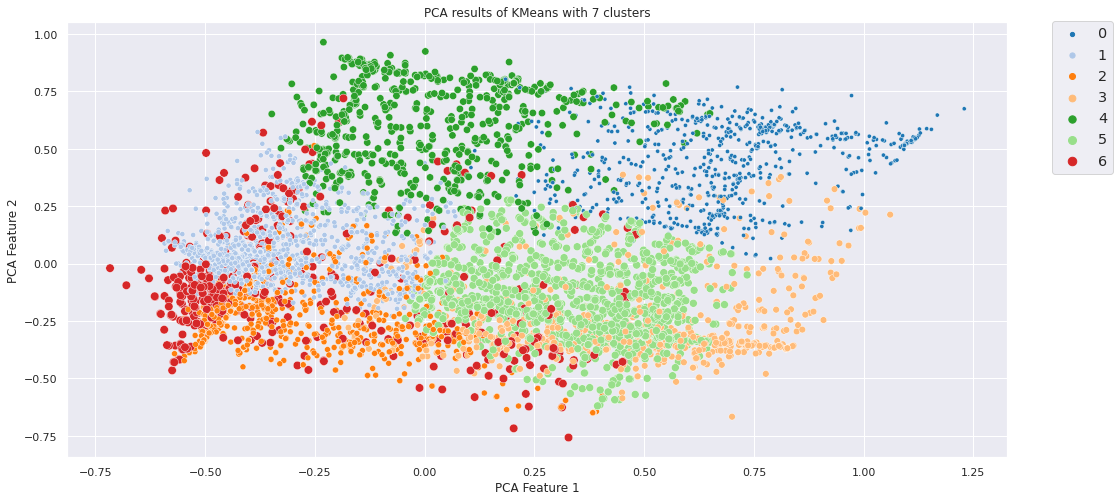

In [166]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.scatterplot(x='pc_1', y='pc_2', 
                hue='cluster_id', 
                size='cluster_id', 
                data=df_pca_features, 
                palette='tab20', 
                legend='full')
ax.set_xlabel('PCA Feature 1')
ax.set_ylabel('PCA Feature 2')
ax.set_title('PCA results of KMeans with ' + str(k) + ' clusters')
ax.legend(bbox_to_anchor=(1.04,1.02), loc='upper left', fontsize='large');

In [167]:
pca.explained_variance_ratio_

array([0.36017651, 0.17716251])

In [ ]:
#do EDA and check if the 7 clusters are ok